In [1]:
from numpy import random
import os

from mrcnn import visualize
import mrcnn.model as modellib
from mrcnn import utils

from dataset import ShapesDataset
from mrcnn.train_config import train_Config

Using TensorFlow backend.


KeyboardInterrupt: 

In [ ]:
"""GPU>1のときに用いる．
VRAMのリミッター解除
GPU_COUNT=1のときはすべてコメントアウトしてかまわない．
ここのconfigは上のハイパーパラメータとは異なるのだが，名前だけ変えてもうまく動かない汗

Args:
    config:TensorFlowのConfigであることに注意！　名前変えたいが，変えると動かぬ（直します）
"""

import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
 
config = tf.ConfigProto()
config.allow_soft_placement=True
session = tf.Session(config=config)
KTF.set_session(session)

In [ ]:
dataset_pass = "./dataset_valid_miru2"
model_path = "logs/3+.h5"

dataset_val = ShapesDataset()
dataset_val.load_dataset(dataset_pass)
dataset_val.prepare()

config = train_Config()

model = modellib.MaskRCNN(mode="inference", model_dir=model_path,config=config)

#model.load_weights(model_path, by_name=True,exclude=["mrcnn_class_logits", "mrcnn_bbox_fc","mrcnn_bbox", "mrcnn_mask"])
model.load_weights(model_path, by_name=True)

['./dataset_valid_miru2/0day/0.png.jpg', './dataset_valid_miru2/0day/1.png.jpg', './dataset_valid_miru2/0day/2.png.jpg', './dataset_valid_miru2/0day/3.png.jpg', './dataset_valid_miru2/0day/4.png.jpg', './dataset_valid_miru2/0day/5.png.jpg', './dataset_valid_miru2/0day/6.png.jpg', './dataset_valid_miru2/0day/7.png.jpg', './dataset_valid_miru2/0day/8.png.jpg', './dataset_valid_miru2/0day/9.png.jpg', './dataset_valid_miru2/0day/10.png.jpg', './dataset_valid_miru2/0day/11.png.jpg', './dataset_valid_miru2/0day/12.png.jpg', './dataset_valid_miru2/0day/13.png.jpg', './dataset_valid_miru2/0day/14.png.jpg', './dataset_valid_miru2/0day/15.png.jpg', './dataset_valid_miru2/0day/16.png.jpg', './dataset_valid_miru2/0day/17.png.jpg', './dataset_valid_miru2/0day/18.png.jpg', './dataset_valid_miru2/0day/19.png.jpg', './dataset_valid_miru2/0day/20.png.jpg', './dataset_valid_miru2/0day/21.png.jpg', './dataset_valid_miru2/0day/22.png.jpg', './dataset_valid_miru2/0day/23.png.jpg', './dataset_valid_miru2/0d

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
Processing 1 images
image                    shape: (512, 512, 3)         min:   20.00000  max:  247.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min:  -96.80000  max:  127.20000  float64
image_metas              shape: (1, 18)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.35425  max:    1.22900  float32
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
Processing 1 images
image                    shape: (512, 512, 3)         min:   23.00000  max:  250.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min:  -93.80000  max:  126.30000  float64
image_metas              shape: (1, 18)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.35425  max:    1.2

/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Processing 1 images
image                    shape: (512, 512, 3)         min:    8.00000  max:  246.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -108.80000  max:  122.30000  float64
image_metas              shape: (1, 18)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.35425  max:    1.22900  float32
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]
Processing 1 images
image                    shape: (512, 512, 3)         min:   18.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min:  -98.80000  max:  131.30000  float64
image_metas              shape: (1, 18)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.35425  max:    1.22900  float32
[2 2 2 2 2 2 2 2 2 2 2 2

IndexError: list index out of range

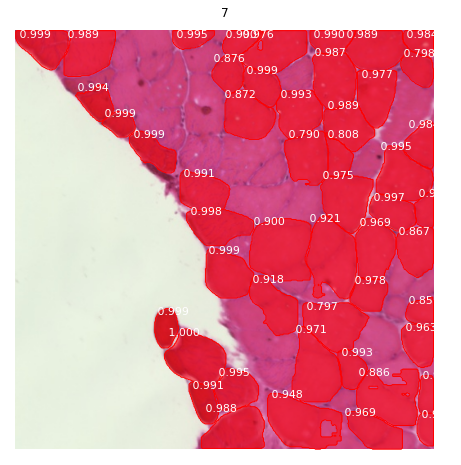

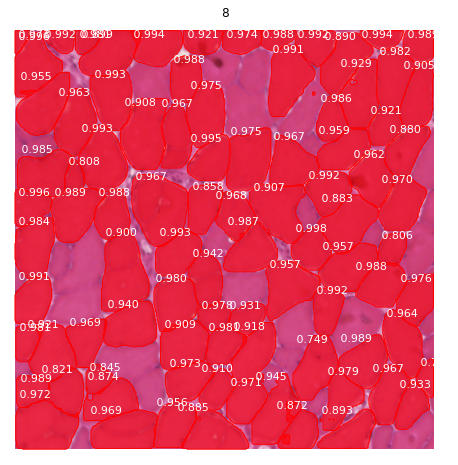

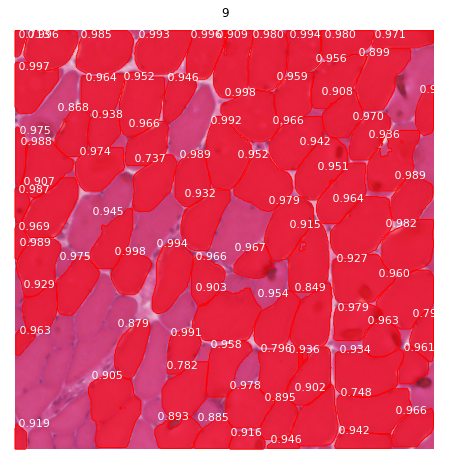

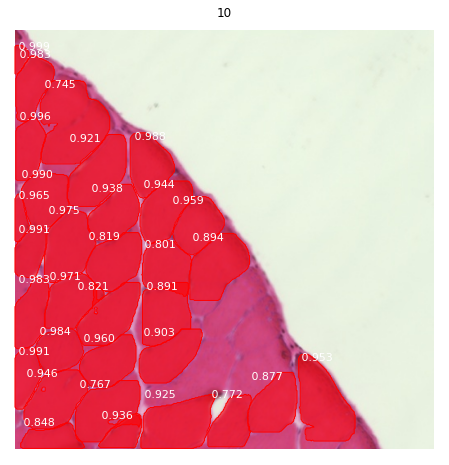

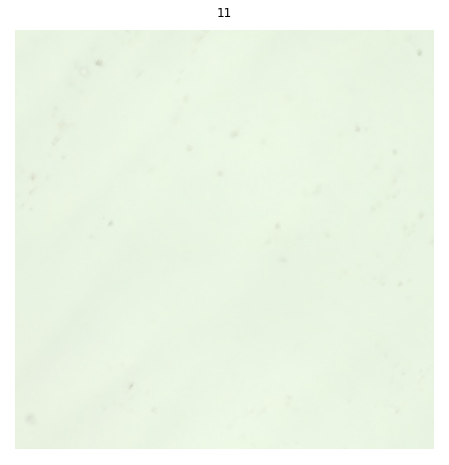

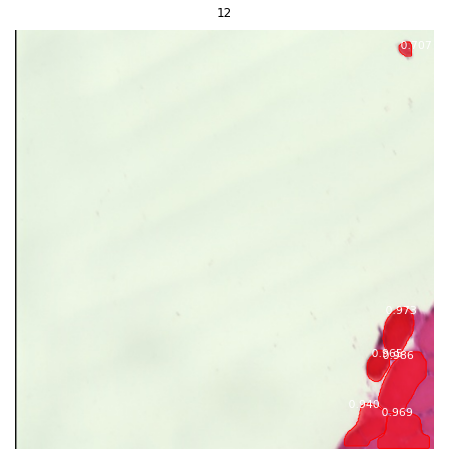

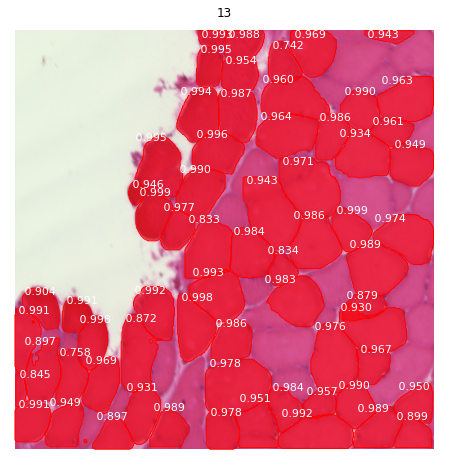

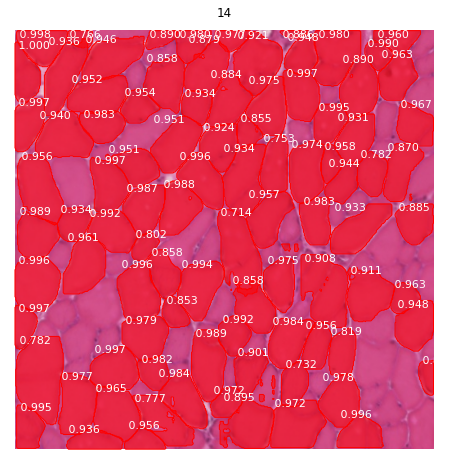

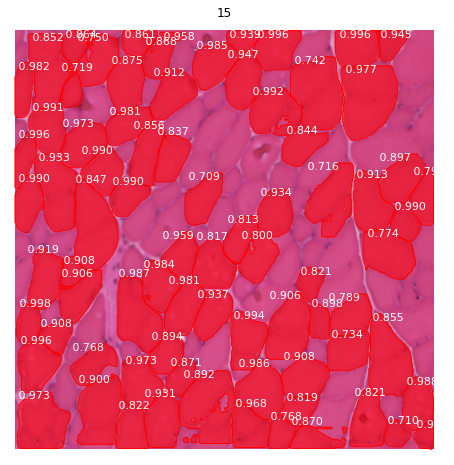

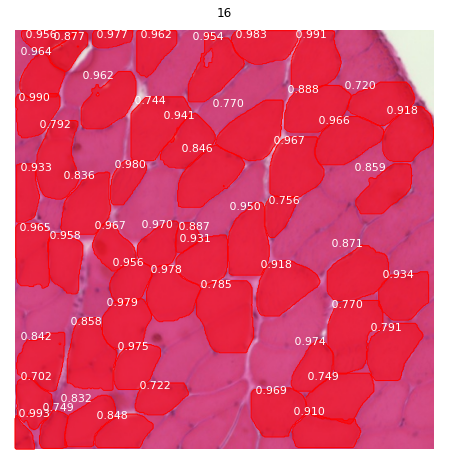

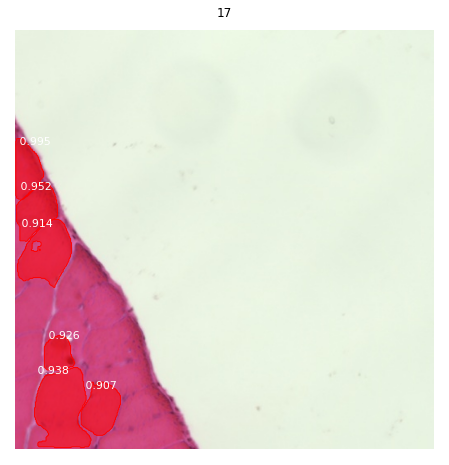

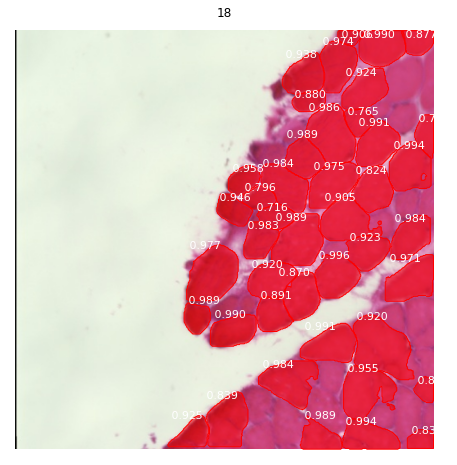

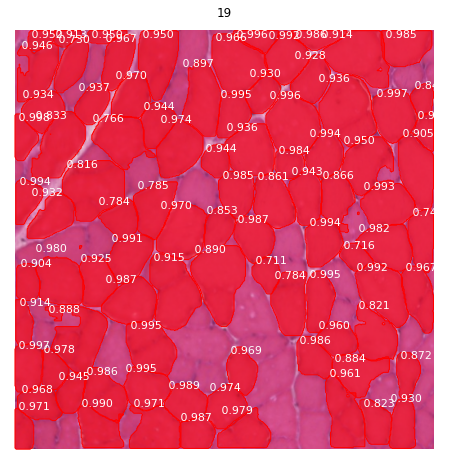

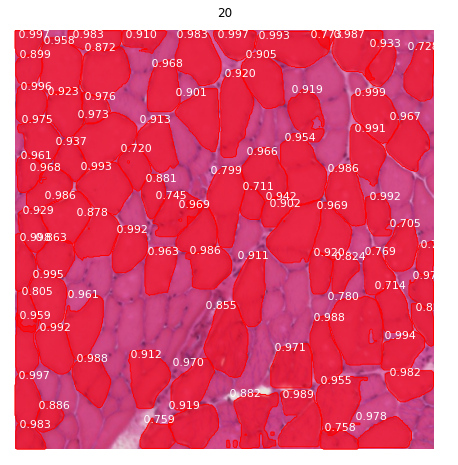

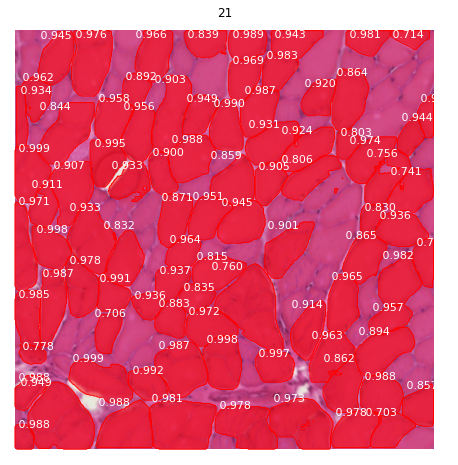

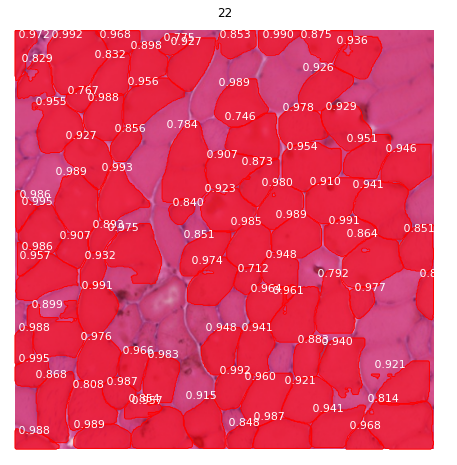

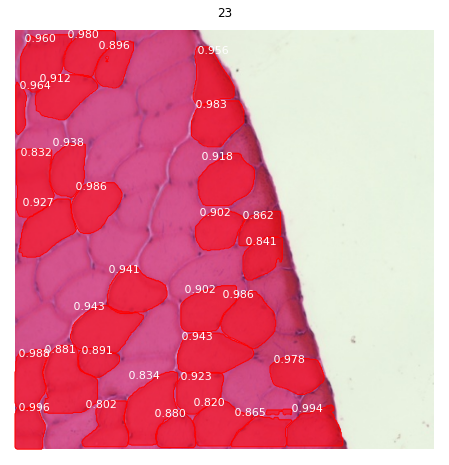

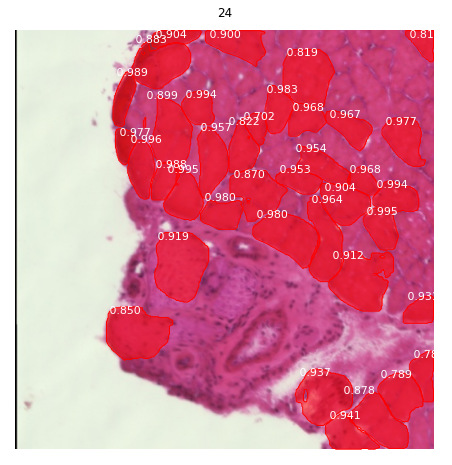

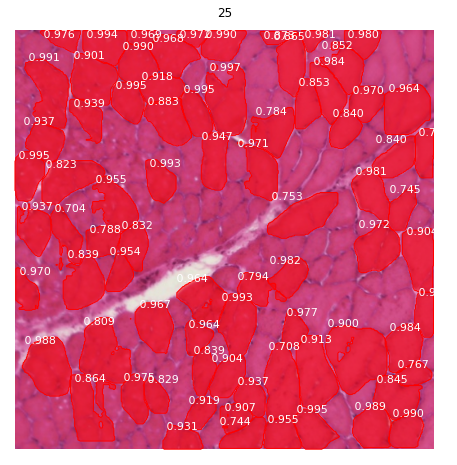

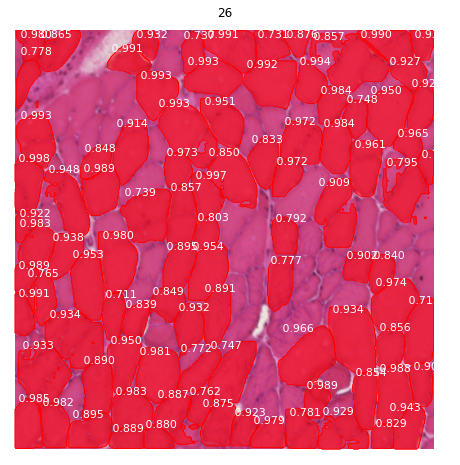

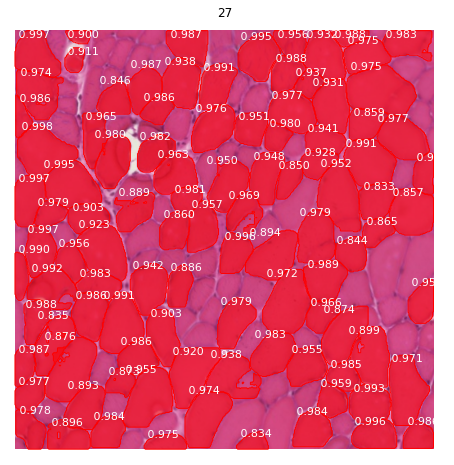

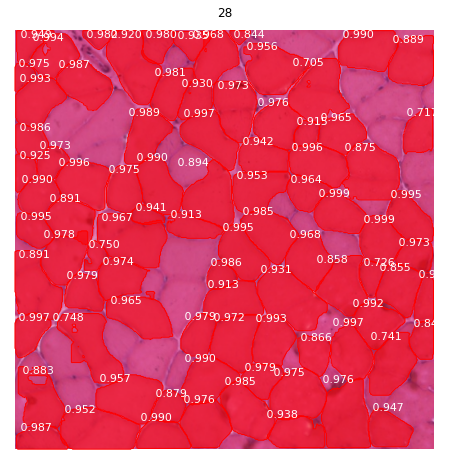

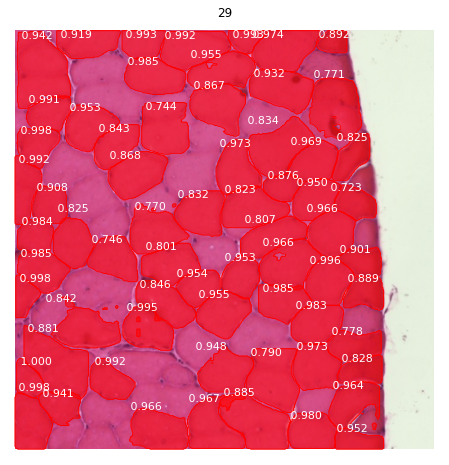

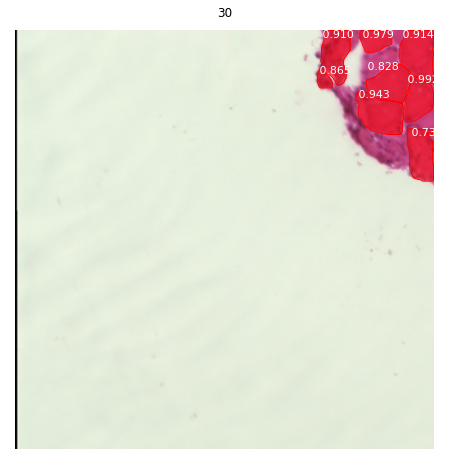

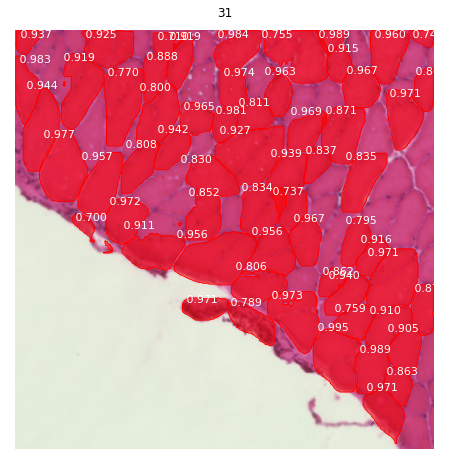

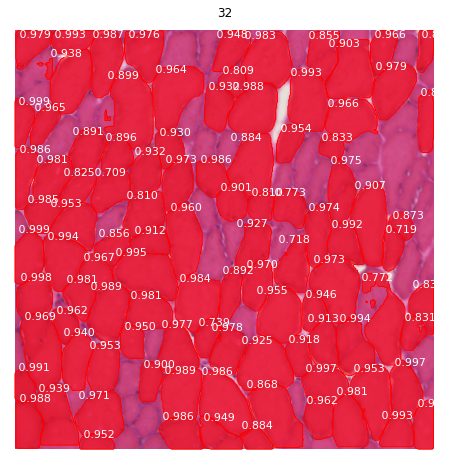

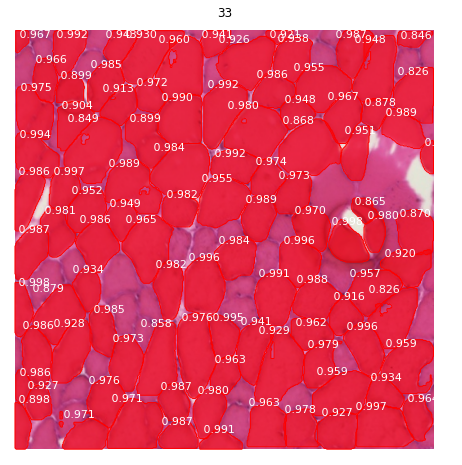

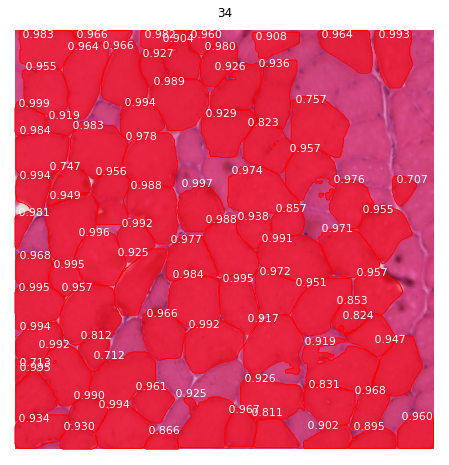

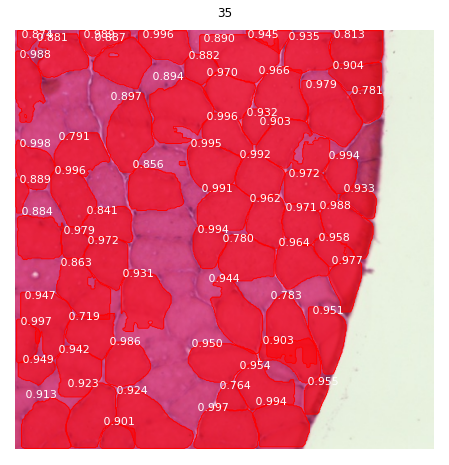

In [ ]:
"""
推定した結果を出力する．
Args:
    image_id:出力する画像名．
"""
print(dataset_val.image_ids)
image_id = random.choice(dataset_val.image_ids)

image_id = 5

for image_id in range(36):
    image_id = image_id + 7
    image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_val, config, image_id)
    info = dataset_val.image_info[image_id]

    results = model.detect([image], verbose=1)


    import matplotlib.pyplot as plt
    def get_ax(rows=1, cols=1, size=8):
        _, ax = plt.subplots(rows, cols, figsize=(size * cols, size * rows))
        return ax

    # Display results
    r = results[0]
    print( r['class_ids'])
    #print(image)
    dataset_val.class_names = ["","","","",""]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                                dataset_val.class_names, r['scores'],
                                ax=get_ax(),
                                title=str(image_id),
                                show_bbox=False,
                                captions=False,
                                image_name = "result/3day/"+str(image_id)+".jpg")